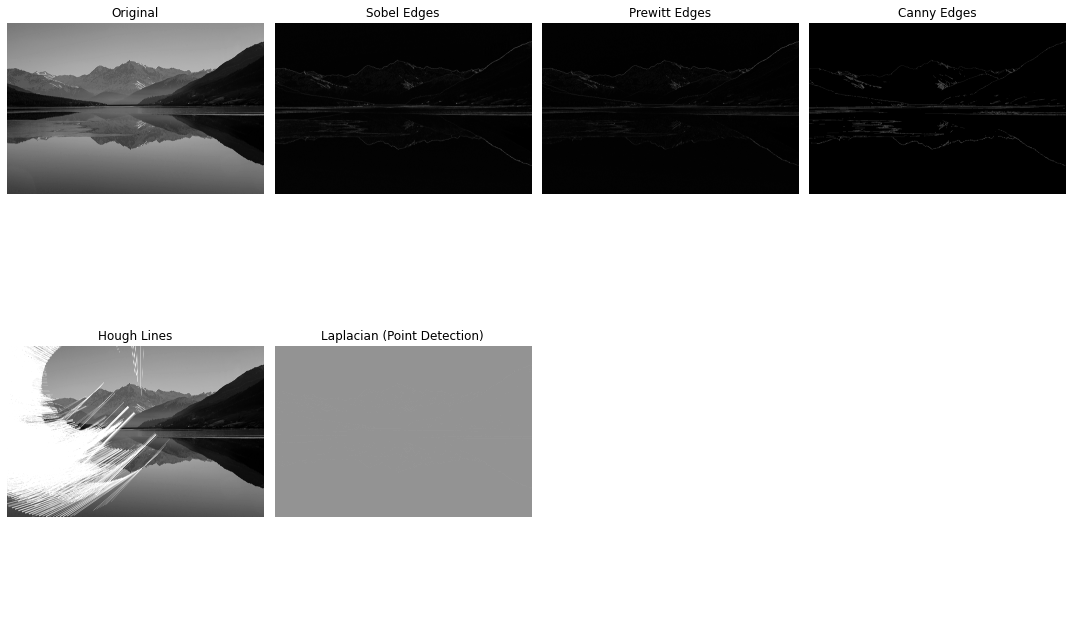

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('C:\\Users\\Student\\Documents\\Img processing\\image.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Make sure 'image.jpg' exists in the directory.")

# Apply Gaussian blur for noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Edge Detection using Sobel, Prewitt, and Canny
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

prewitt_x = cv2.filter2D(blurred_image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(blurred_image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_edges = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

canny_edges = cv2.Canny(blurred_image, 50, 150)

# Line Detection using Hough Transform
edges = cv2.Canny(blurred_image, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
line_image = np.copy(image)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = int(a * rho), int(b * rho)
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Point Detection using Laplacian Filter
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Display Results
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes[0, 0].imshow(image, cmap='gray'); axes[0, 0].set_title("Original")
axes[0, 1].imshow(sobel_edges, cmap='gray'); axes[0, 1].set_title("Sobel Edges")
axes[0, 2].imshow(prewitt_edges, cmap='gray'); axes[0, 2].set_title("Prewitt Edges")
axes[0, 3].imshow(canny_edges, cmap='gray'); axes[0, 3].set_title("Canny Edges")

axes[1, 0].imshow(line_image, cmap='gray'); axes[1, 0].set_title("Hough Lines")
axes[1, 1].imshow(laplacian, cmap='gray'); axes[1, 1].set_title("Laplacian (Point Detection)")

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()
